<a href="https://colab.research.google.com/github/Swastik3025/mnist-dataset/blob/main/mnist_digit_classification_using_SGDClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

import warnings
warnings.filterwarnings('ignore')


In [105]:
from sklearn.datasets import load_digits
mnist=load_digits() # creating the instance of load_digits dict

In [106]:
# knowing about the keys of the dict / dataset mnist
dir(mnist)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

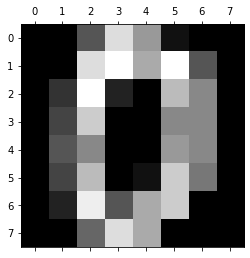

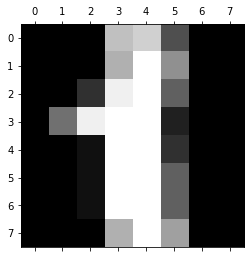

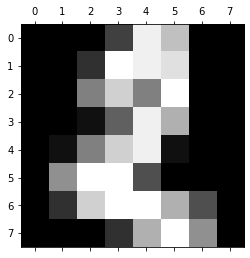

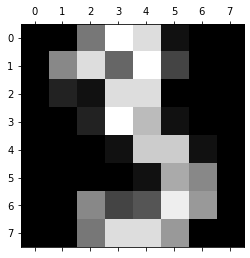

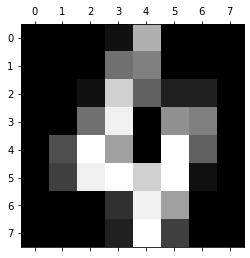

In [107]:
# visualizing the first 5 digits of the dataset
plt.gray()
for i in range(5):
  plt.matshow(mnist.images[i])

In [108]:
# extracting the input data and the corr. target values
X,y=mnist["data"],mnist["target"]
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [109]:
X[0]
X[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

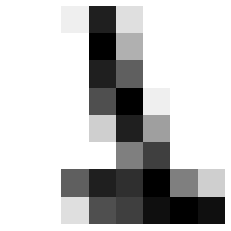

In [110]:
import matplotlib

# visualize the imput data
some_digit=X[1000] # is a 1d array
# reshaping the array as 8x8 (images in the dataset are 8x8 pixels)
some_digit_image=some_digit.reshape(8,8)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [111]:
# moving towards model training

# train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)

In [112]:
X_train.shape

(1527, 64)

In [113]:
y_train.shape

(1527,)

In [114]:
# X_train is a 2d array with each row as a 64 sized array containing the pixel densities

In [115]:
shuffle_index=np.random.permutation(1527) # for generating random X_train and y_train sets
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

# above result can also be achieved by passing a parameter random_state in the function train_test_split

In [116]:
y_train_1=(y_train==1) # train set with target labels as '1'
y_test_1=(y_test==1) # test set with target labels as '1'

# we get y_train_1, y_test_1 as boolean array

# print(y_train_1)
# print(y_test_1)

In [117]:
# training the model for just classifying the digit '1'

# using a Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_1)

SGDClassifier(random_state=42)

In [118]:
# some_digit=X[1000]
sgd_clf.predict([some_digit])

array([ True])

In [119]:
# instantiate the model
sgd_clf1=SGDClassifier(random_state=45)
sgd_clf1.fit(X_train,y_train)

SGDClassifier(random_state=45)

In [120]:
sgd_clf1.predict([some_digit])

array([1])

In [121]:
score = sgd_clf1.score(X_test,y_test)
print(f"The score is {score.round(8)}")

The score is 0.97407407


In [122]:
# it may happen that the model has overfit the data, so to get a generalised performance of the model, we perform k fold (stratified) cross validation
# stratified here means keeping the number ratio of different classes/features same across sub samples taken (preserving the percentage of samples for each class)

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [123]:
skfolds=StratifiedKFold(n_splits=5,shuffle=True,random_state=45)

scores = []

for train_index,test_index in skfolds.split(X_train,y_train):
  clone_clf=clone(sgd_clf1) # copy the model and train it every time for each fold
  X_train_folds=X_train[train_index]
  y_train_folds=y_train[train_index]
  X_test_fold=X_train[test_index]
  y_test_fold=y_train[test_index]
  clone_clf.fit(X_train_folds,y_train_folds)
  y_pred=clone_clf.predict(X_test_fold)
  n_correct=sum(y_pred==y_test_fold)
  scores.append((n_correct/len(y_pred)).round(8)) # n_correct/len(y_pred) gives the ratio of correct predictions

print(f"Scores:{scores}")

Scores:[0.97385621, 0.94444444, 0.93442623, 0.95737705, 0.94754098]


In [124]:
# above code can be greatly simplified using cross_val_score from sklearn.model_selection

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(sgd_clf1,X_train,y_train,cv=5,scoring='accuracy')

print(f"Average model score: {cv_score.mean().round(8)}")

Average model score: 0.94758384


In [125]:
# predicting the output in consideration with the cross validation performance of the model

from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf1,X_train,y_train,cv=3)
y_train_pred

array([6, 9, 4, ..., 7, 4, 7])

In [126]:
# plot the confusion matrix to better evaluate the model performance

from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_train,y_train_pred)
cf

array([[161,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 133,   2,   3,   0,   0,   3,   0,  11,   4],
       [  0,   2, 145,   1,   0,   0,   0,   0,   1,   0],
       [  0,   2,   0, 145,   0,   5,   0,   1,   2,   1],
       [  2,   3,   0,   0, 140,   0,   3,   1,   1,   1],
       [  0,   1,   1,   0,   0, 150,   1,   0,   0,   2],
       [  1,   2,   0,   0,   0,   2, 147,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0, 146,   1,   0],
       [  0,   5,   2,   0,   1,   4,   0,   1, 133,   3],
       [  0,   1,   0,   2,   0,   3,   0,   1,   7, 136]], dtype=int64)

Text(51.0, 0.5, 'Actual')

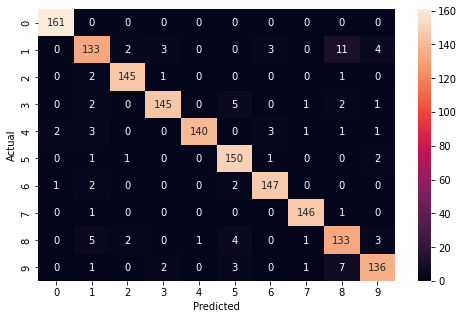

In [127]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.heatmap(cf,annot=True,fmt=',d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [128]:
from sklearn.metrics import classification_report

report = classification_report(y_train,y_train_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       161
           1       0.89      0.85      0.87       156
           2       0.97      0.97      0.97       149
           3       0.96      0.93      0.94       156
           4       0.99      0.93      0.96       151
           5       0.91      0.97      0.94       155
           6       0.95      0.97      0.96       152
           7       0.97      0.99      0.98       148
           8       0.85      0.89      0.87       149
           9       0.93      0.91      0.92       150

    accuracy                           0.94      1527
   macro avg       0.94      0.94      0.94      1527
weighted avg       0.94      0.94      0.94      1527



In [129]:
# now, testing our model on test data

model_score = sgd_clf1.score(X_test, y_test)
print(f"Model score on test data: {model_score.round(8)}")

Model score on test data: 0.97407407


In [130]:
y_test_pred = sgd_clf1.predict(X_test)

In [131]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_test_pred)
cf

array([[17,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 25,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 28,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 27,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 28,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 29,  0,  1],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 23,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 29]], dtype=int64)

Text(51.0, 0.5, 'Actual')

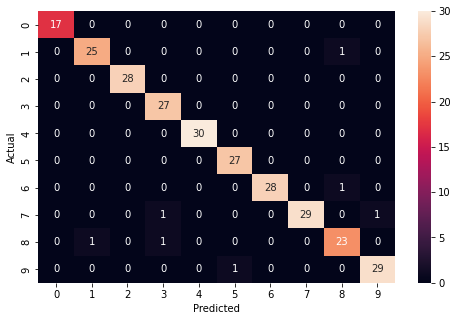

In [132]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.heatmap(cf,annot=True,fmt=',d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [133]:
from sklearn.metrics import classification_report

report = classification_report(y_test,y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.96      0.96      0.96        26
           2       1.00      1.00      1.00        28
           3       0.93      1.00      0.96        27
           4       1.00      1.00      1.00        30
           5       0.96      1.00      0.98        27
           6       1.00      0.97      0.98        29
           7       1.00      0.94      0.97        31
           8       0.92      0.92      0.92        25
           9       0.97      0.97      0.97        30

    accuracy                           0.97       270
   macro avg       0.97      0.97      0.97       270
weighted avg       0.97      0.97      0.97       270



In [134]:
# we just tried SGDClassifier on the dataset

In [135]:
# let us try some other models on our dataset

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    "Logistic Regression":LogisticRegression(),
    "SGDClassifier":SGDClassifier(),
    "SVM Classifier":SVC(),
    "DecisionTree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "XGBoost Classifier":XGBClassifier(),
}

In [138]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

def eval_model(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    accuracy = accuracy_score(y_true, y_pred)

    Classification_report = classification_report(y_true, y_pred)

    return cm, accuracy, Classification_report


In [139]:
model_list = []
accuracy_list = []

for i in range(len(list(models))):
    # model training
    model = list(models.values())[i] # list(models.values()) is a list having instances of the models
    model.fit(X_train, y_train)

    # model testing
    y_pred_train = model.predict(X_train)

    # model performance
    model_cm, model_accuracy, model_classification_report = eval_model(y_train, y_pred_train)

    # printing the results
    print("\n")
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for train set")
    print(f"- Confusion Matrix:\n{model_cm}")
    print(f"- Accuracy: {model_accuracy}")
    print(f"- Model Classification Report:\n {model_classification_report}")

    print("---------------------------------------------")

    accuracy_list.append(model_accuracy)




Logistic Regression
Model performance for train set
- Confusion Matrix:
[[161   0   0   0   0   0   0   0   0   0]
 [  0 171   0   0   0   0   0   0   0   0]
 [  0   0 160   0   0   0   0   0   0   0]
 [  0   0   0 166   0   0   0   0   0   0]
 [  0   0   0   0 156   0   0   0   0   0]
 [  0   0   0   0   0 160   0   0   0   0]
 [  0   0   0   0   0   0 162   0   0   0]
 [  0   0   0   0   0   0   0 160   0   0]
 [  0   0   0   0   0   0   0   0 166   0]
 [  0   0   0   0   0   0   0   0   0 155]]
- Accuracy: 1.0
- Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00       171
           2       1.00      1.00      1.00       160
           3       1.00      1.00      1.00       166
           4       1.00      1.00      1.00       156
           5       1.00      1.00      1.00       160
           6       1.00      1.00      1.00       162
           7  

In [140]:
train_result = pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=["Accuracy"],ascending=False)

In [141]:
train_result

,Model Name,Accuracy
0,Logistic Regression,1.000000
3,DecisionTree,1.000000
4,Random Forest,1.000000
5,XGBoost Classifier,1.000000
2,SVM Classifier,0.996908
1,SGDClassifier,0.967842


In [142]:
# check performance on test set

test_model_list = []
test_accuracy_list = []

for i in range(len(list(models))):

    model = list(models.values())[i]
    # model testing
    y_pred_test = model.predict(X_test)

    # model performance
    test_model_cm, test_model_accuracy, test_model_classification_report = eval_model(y_test, y_pred_test)

    # printing the results
    print("\n")
    print(list(models.keys())[i])
    test_model_list.append(list(models.keys())[i])

    print("Model performance for test set")
    print(f"- Confusion Matrix:\n{test_model_cm}")
    print(f"- Accuracy: {test_model_accuracy}")
    print(f"- Model Classification Report:\n {test_model_classification_report}")

    print("---------------------------------------------")

    test_accuracy_list.append(test_model_accuracy)




Logistic Regression
Model performance for test set
- Confusion Matrix:
[[17  0  0  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0 16  0  1  0  0  0  0]
 [ 0  0  0  0 24  0  1  0  0  0]
 [ 0  0  0  0  0 22  0  0  0  0]
 [ 0  0  0  0  0  0 19  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  1]
 [ 0  0  0  0  0  0  0  0  8  0]
 [ 0  0  0  1  0  0  0  0  1 23]]
- Accuracy: 0.9722222222222222
- Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        17
           3       0.94      0.94      0.94        17
           4       1.00      0.96      0.98        25
           5       0.96      1.00      0.98        22
           6       0.95      1.00      0.97        19
           7       1.00      0.95      0.97        19
           8       0.89      1.00      0.94   

In [143]:
test_result = pd.DataFrame(list(zip(test_model_list, test_accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=["Accuracy"],ascending=False)

In [144]:
train_result

,Model Name,Accuracy
0,Logistic Regression,1.000000
3,DecisionTree,1.000000
4,Random Forest,1.000000
5,XGBoost Classifier,1.000000
2,SVM Classifier,0.996908
1,SGDClassifier,0.967842


In [145]:
test_result

,Model Name,Accuracy
4,Random Forest,0.988889
2,SVM Classifier,0.983333
0,Logistic Regression,0.972222
1,SGDClassifier,0.966667
5,XGBoost Classifier,0.966667
3,DecisionTree,0.866667


In [146]:
# we got decreased performance for some of the models, this can be due to overfitting to the train data

In [147]:
# we can boost the performance of the model(s) by hyperparameter tuning

In [148]:
# takes long time to run because GridSearchCV finds the best hyperparameters by manually training the data wrt to each combination of provided hyperparameters
# further tweaking of the hyperparameters can result in even better results

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

def find_best_hyper_params_using_gridsearchcv(X,y):
    algos = { # a python dictionary
        "Logistic Regression" : {
            "model": LogisticRegression(),
            "params": { # hyper parameter tuning
                "penalty": ["l1", "l2", "elasticnet"],
                "C": [0.0001, 0.001, 0.01, 0.1], # inverse of regularisation term
                "max_iter": [1000, 5000, 10000, 20000]
            }
        },
        "SGDClassifier" : {
            "model": SGDClassifier(),
            "params": {
                "loss":["hinge", "log_loss"],
                "penalty": ["l1", "l2", "elasticnet"],
                "alpha": [0.0001, 0.001, 0.01, 0.1],
                "learning_rate": ['constant', 'invscaling', 'adaptive', 'optimal'],
                "max_iter": [1000, 5000, 10000, 20000]
            }
        },
        "SVM Classifier" : {
            "model": SVC(),
            "params": {
                "kernel":["linear", "poly", "rbf", "sigmoid"],
                "gamma": ["scale", "auto"],
                "C": [0.0001, 0.001, 0.01, 0.1],
                "max_iter": [1000, 5000, 10000, 20000]
            }
        },
        "Decision Tree Classifier" : {
            "model": DecisionTreeClassifier(),
            "params": {
                "criterion":["gini", "log_loss", "entropy"],
                "max_depth": [4,8,16,32],
                "splitter":["best","random"],
                'max_features':['sqrt','log2'],
            }
        },
        "Random Forest Classifier" : {
            "model": RandomForestClassifier(),
            "params": {
                "criterion":["gini", "log_loss", "entropy"],
                "max_depth": [4,8,16,32],
                'max_features':['sqrt','log2'],
                'n_estimators': [8,16,32,64,128,256]
            }
        },
        "XGBoost Classifier" : {
            "model": XGBClassifier(),
            "params": {
                'learning_rate':[0.0001, 0.001, 0.01, 0.1],
                'subsample':[0.75,0.8,0.85,0.9],
                'n_estimators': [8,16,32,64,128,256]
            }
        },
    }
    mod_scores = []
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.15, random_state=42)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config["model"], config["params"], cv=cv, return_train_score=False)
        gs.fit(X,y)
        mod_scores.append({
            "model": algo_name,
            "best_score": gs.best_score_,
            "best_params": gs.best_params_
        })

    return pd.DataFrame(mod_scores,columns=["model","best_score","best_params"])

performance = find_best_hyper_params_using_gridsearchcv(X_train, y_train)

In [149]:
performance

,model,best_score,best_params
0,Logistic Regression,0.966255,"{'C': 0.1, 'max_iter': 1000, 'penalty': 'l2'}"
1,SGDClassifier,0.962140,"{'alpha': 0.1, 'learning_rate': 'optimal', 'lo..."
2,SVM Classifier,0.986008,"{'C': 0.0001, 'gamma': 'auto', 'kernel': 'poly..."
3,Decision Tree Classifier,0.822222,"{'criterion': 'entropy', 'max_depth': 32, 'max..."
4,Random Forest Classifier,0.974486,"{'criterion': 'gini', 'max_depth': 16, 'max_fe..."
5,XGBoost Classifier,0.967078,"{'learning_rate': 0.1, 'n_estimators': 128, 's..."


In [150]:
logreg_hp = performance["best_params"][0]
sgdclf_hp = performance["best_params"][1]
svmclf_hp = performance["best_params"][2]
dectree_hp = performance["best_params"][3]
randfor_hp = performance["best_params"][4]
xgb_hp = performance["best_params"][5]

In [151]:
# let us train our models again with the found hyperparameters

In [152]:
# passing these hyperparameters to the models

In [153]:
LogReg_Clf = LogisticRegression(
    C=logreg_hp["C"], penalty=logreg_hp["penalty"], max_iter=logreg_hp["max_iter"]
)

SGD_Clf = SGDClassifier(
    alpha=sgdclf_hp["alpha"], learning_rate=sgdclf_hp["learning_rate"], loss=sgdclf_hp["loss"], max_iter=sgdclf_hp["max_iter"], penalty=sgdclf_hp["penalty"]
)

SVM_Clf = SVC(
    C=svmclf_hp["C"], gamma=svmclf_hp["gamma"], kernel=svmclf_hp["kernel"], max_iter=svmclf_hp["max_iter"]
)

DecTree_Clf = DecisionTreeClassifier(
    criterion=dectree_hp["criterion"], max_depth=dectree_hp["max_depth"], max_features=dectree_hp["max_features"], splitter=dectree_hp["splitter"]
)

RandomForest_Clf = RandomForestClassifier(
    criterion=randfor_hp["criterion"], max_depth=randfor_hp["max_depth"], max_features=randfor_hp["max_features"], n_estimators=randfor_hp["n_estimators"]
)

XGB_Clf = XGBClassifier(
    learning_rate=xgb_hp["learning_rate"], n_estimators=xgb_hp["n_estimators"], subsample=xgb_hp["subsample"]
)

In [154]:
upd_models = {
    "LogisticRegression" : LogReg_Clf,
    "SGDClassifier" : SGD_Clf,
    "SVMClassifier" : SVM_Clf,
    "DecisionTreeClassifier" : DecTree_Clf,
    "RandomForestClassifier" : RandomForest_Clf,
    "XGBClassifier" : XGB_Clf
}

In [155]:
for model in list(upd_models.values()):
    model.fit(X_train, y_train)

In [158]:
final_res = {}
for name, model in upd_models.items():
    y_pred = model.predict(X_test)
    final_res[name] = accuracy_score(y_test, y_pred).round(8)


In [159]:
final_res

{'LogisticRegression': 0.97777778,
 'SGDClassifier': 0.97222222,
 'SVMClassifier': 0.97777778,
 'DecisionTreeClassifier': 0.80555556,
 'RandomForestClassifier': 0.97777778,
 'XGBClassifier': 0.97222222}

In [171]:
final_res_df = pd.DataFrame((list(final_res.items())), columns=["Model", "Model Score"]).sort_values(by=["Model Score"],ascending=False)

In [ ]:
# here,LogisticRegression, SVM Classifier and RandomForestClassifier performed really well among other models

In [167]:
test_result

,Model Name,Accuracy
4,Random Forest,0.988889
2,SVM Classifier,0.983333
0,Logistic Regression,0.972222
1,SGDClassifier,0.966667
5,XGBoost Classifier,0.966667
3,DecisionTree,0.866667


In [172]:
final_res_df # after hyperparameter tuning

,Model,Model Score
0,LogisticRegression,0.977778
2,SVMClassifier,0.977778
4,RandomForestClassifier,0.977778
1,SGDClassifier,0.972222
5,XGBClassifier,0.972222
3,DecisionTreeClassifier,0.805556


**Logistic Regression, SVM Classifier** and **Random Forest Classifier** had a tie after hyperparameter tuning.

**Random Forest Classifier** performed well on test data even without hyperparameter tuning.